# Path Reconstruction Experiment  

## Contents

### 1. Introduction

### 2. Apparatus

### 3. Communicating with the microcontroller

### 4. Calibrating the BNO055 

### 5. Identifying the data

### 6. Straight line run

### 7. Circular run

### 8. Arbitrary run

### 9. Report


## Objectives

- To identify various sources of errors in a set of experimental data
- To calibrate a Bosch BNO055 motion sensor
- To perform a path reconstruction using a set of experimental data
- To compare this path reconstruction with the original path travelled

## 1. Introduction

[comment]: <> (Rationale paragraph(s))
A key issue in engineering and science in general is the presence of errors in experimental data. Such errors cause discrepancies in the experimental results, and can lead to divergence between what is theoretically predicted and what is observed in reality. It is therefore important to be aware of these errors, and to also recognise that fully eliminating them can be extremely difficult.

This experiment aims to demonstrate how experiment and reality can diverge and why this happens, as well as giving an insight into the capabilities of Python and the Jupyter notebooks. It will also go over a few basic parts of IA Mechanics. The experiment will involve using the data from a motion sensor to reconstruct the path it has travelled in various configurations, and comparing this reconstructed path with the path taken in reality. 

[comment]: <> (Apparatus)

## 2. Apparatus

Figure 1 shows the main apparatus of the experiment, the Bosch BNO055 *Intelligent 9-axis Absolute Orientation Sensor*. 


<img style="width:280px;height:210px"  align="left" src="sensor.jpg" alt="Figure 1: Bosch BNO055">
<br><br><br><br><br><br><br><br><br><br><br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; *Figure 1: A Bosch BNO055*

The BNO055 is a highly sophisticated sensor with a range of capabilities. It consists of an accelerometer, a gyroscope, a magnetometer and a microcontroller, which allow it to accurately record its motion. Consequently it has a range of applications, in fields such as navigation, robotics, augmented and virtual reality. For example, it can be used in conjunction with GPS on a car to provide accurate tracking and orientation, or in a smartphone to track the phone's orientation. It can also be used in virtual reality headsets such as the Oculus Rift. See the video below for an example:

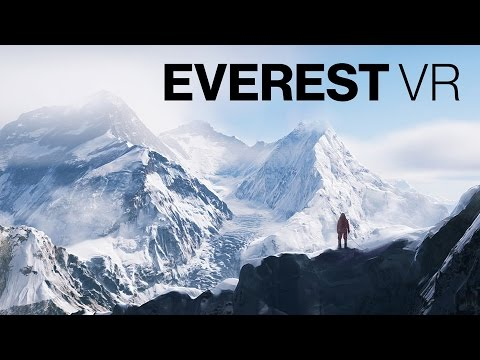

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('iTlnm8Jn6_c')

The BNO055 is made up of four component parts:
- An accelerometer
- A gyroscope
- A magnetometer
- A microcontroller

The BNO055 has several modes of operation that uses some or all of these component parts. These modes can be divided into two groups: non-fusion and fusion modes. The non-fusion modes are simpler and are used when only raw data is needed from the sensors. The fusion modes are more complex and involve the use of the microcontroller to process the raw data. They can output additional information such as the absolute orientation of the sensor. 

### 2.1. Accelerometer

The accelerometer is triaxial, so it can measure its acceleration in the *x*, *y* and *z* axes. It can measure its overall acceleration in each of these axes, as well as separately measuring the acceleration into the gravitational acceleration caused by the Earth and the linear acceleration caused by the motion of the sensor. The accelerometer has a precision of ±0.01 m/s². 

### 2.2. Gyroscope 

The gyroscope is also triaxial, and can measure the sensor's angular velocity in all three axes. The gyroscope has a precision of ±0.001 rad/s. 

### 2.3. Magnetometer 

Like the other two sensors the magnetometer is also triaxial. It is not used in this experiment so further details are not provided. If you would like to find out more, see the online Bosch BNO055 documentation for further details.

### 2.4. Microcontroller

The BNO055 microcontroller ties together the three sensors and allows the sensor to implement the fusion modes.

[comment]: <> (Other apparatus paragraph)

The BNO055 is combined with an Arduino chip and Raspberry Pi computer to form a microcontroller (see Figure? Outlining the structure of the microcontroller like in the presentation?). The Arduino chip communicates with the Bosch sensor to specify what data should be measured. This data is then relayed by the Arduino to the Raspberry Pi, which stores it in the form of a text file. You will read this text file into Python and store the various data values in arrays. 

Further information on the Bosch BNO055 can be found in its documentation, which can be accessed [here](https://cdn-shop.adafruit.com/datasheets/BST_BNO055_DS000_12.pdf).

The first run that the sensor will perform will be a simple circular path. Figure 3 shows an example of the stainless steel turntable that the sensor will be placed on for this run. 

## 3. Communicating with the microcontroller

The first task in this experiment is to set up communications with the microcontroller. 

### 3.1. Setup

#### 1. **Turn the microcontroller on.** 

Turn on the RS battery on the top of the microcontroller. Lights should come on in the internal working of the microcontroller.

#### 2. **Boot up the microcontroller.**

Get your demonstrator to help you with this part.

### 3.2. Data collection

#### 1. **Collect  data.**

At this stage in the experiment, you won't perform any path reconstruction. For now, just collect some data while the microcontroller is at rest. 

1. Press the green button on the microcontroller.
    
    *The green LED should light up when you do this. If it still hasn't lit up after a few seconds, ask your demonstrator for help.*
    <br><br>
    
2. Let the microcontroller collect a set of data.

    *The green LED indicates when the microcontroller is logging data. Leave it for a couple of seconds to collect a reasonable sample.* 
    <br><br>
    
3. Press the green button again. 

    *The green LED should now turn off, indicating that the microcontroller has stopped logging data.*
    <br><br>
    
4. Press the red button.

    *Pressing the red button writes data from the Arduino to the Raspberry Pi into a text file that you can access. The red LED should light up when you press the button.*
    <br><br>
    
5. Press the red button again.

    *Pressing the red button again closes the text file. The red LED should now turn off.*
    

#### 2. **Import data.**

Ask your demonstrator to help you with this part. 

Name your file something distinctive and short. 

#### 3. **Check data.**

Check that the data has all been logged correctly. This needs you to read the data into the Notebook, which you can do by running the two codeblocks below. Make sure to enter your file name when prompted. 

## Data Logging codeblock

In [2]:
import matplotlib.pyplot as plt # Imports the matplotlib library, so we can plot the data. 
import func6                    # Imports the func5 library, which contains various functions for this experiment
import numpy as np              # Imports the numpy library

filename = ""
filename = input('Enter your file name: ') 

# Picks a default file in case no filename is entered

if filename == "":
    f = open('Still Run 3') # Opens the file
    length = len(f.readlines()) # Stores the number of lines in the file
    f = open('Still Run 3') # Opens the file again 

else:
    f = open(filename) # Opens the file
    length = len(f.readlines()) #Stores the number of lines in the file
    f = open(filename) # Opens the file again 

    
# The following line extracts the various measurements from the file and stores them in arrays

time, yomega, xomega, zomega, yaccel, xaccel, zaccel, acalib, gcalib, rev = func6.FileRead(f,length)

Enter your file name: Circle1


In [ ]:
# Plots the angular velocity about the z axis against time, as a test.

%matplotlib inline
plt.figure(1) 
plt.plot(time, zomega)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Rotational velocity (rad/s)')

If the graph plots correctly, we know that communications have been set up successfully with the microcontroller. 

## 4. Calibrating the BNO055

Having successfully communicated with the microcontroller, you now need to calibrate the Bosch BNO055 sensor. Calibration of the apparatus is important in any experiment, as it ensures that the data collected is reliable. The BNO055 has a calibration register for each sensor that is a gauge of how well calibrated they are. Each register varies from 0 to 3, with 0 meaning the sensor is uncalibrated and 3 meaning the sensor is fully calibrated. 

For this experiment you will only be using the accelerometer and gyroscope sensors on the BNO055, so these are the only sensors you need to calibrate. 

### 4.1. Gyroscope calibration

The easier of the two sensors to calibrate is the gyroscope. To calibrate the gyroscope, leave the sensor stationary for several seconds while logging data. As you have already done this in the previous section, the gyroscope should already be calibrated. You can check this by looking at the gyroscope calibration register, *gcalib*. If the value of *gcalib* is 3, the gyroscope is correctly calibrated. 

To check *gcalib*, run the codeblock below. You will need to enter *gcalib* in place of *zomega* before running it. 

In [ ]:
# Plots the figure as an image rather than as an interactive plot
%matplotlib inline  

plt.figure(1)       # Plots the figure in Figure 1. Other graphs can be plotted on the same figure if required.
plt.plot(time, gcalib)  # Plots two variables against each other.
plt.grid(True)          # Includes grid lines
plt.xlabel('Time (s)')  # Labels the x axis
plt.ylabel('Gyroscope calibration register value') # Labels the y axis

If *gcalib* is 3, the gyroscope is correctly calibrated. If it is less than this the gyroscope is not correctly calibrated. Repeat Section 3.2. and run the Data Logging codeblock. If the gyroscope is still not calibrated, ask your demonstrator for help. 

### 4.2. Accelerometer calibration 

The accelerometer is the harder sensor to calibrate. It needs to be rotated by 45$^{\circ}$ increments on at least two of the three axes. For an example of this, watch the video below by Bosch SensorTec (skip to 1:40 for the relevant section). 

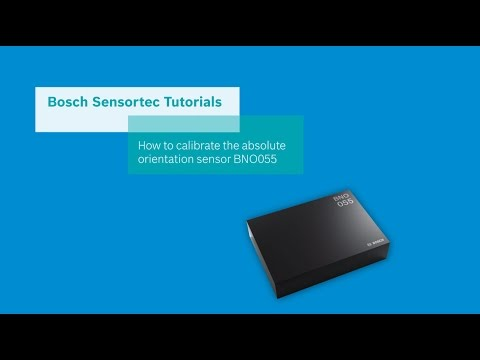

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('Bw0WuAyGsnY')

Carry out a calibration run, rotating the sensor as in the video and following the data logging procedure from Section 3.2. **Make sure to run the Data Logging codeblock, so that the arrays are updated with your new data.**

Once the sensor has been rotated about different axes a few times, it should be correctly calibrated. As with the gyroscope, we can check this by looking at the accelerometer calibration register value, *acalib*. To check *acalib*, run the codeblock below. You will need to enter *acalib* in place of *zomega* before running it. 

In [ ]:
# Plots the figure as an image rather than as an interactive plot
%matplotlib inline 

plt.figure(1)       # Plots the figure in Figure 1. Other graphs can be plotted on the same figure if required.
plt.plot(time, acalib)  # Plots two variables against each other.
plt.grid(True)          # Includes grid lines
plt.xlabel('Time (s)')  # Labels the x axis
plt.ylabel('Accelerometer calibration register value') # Labels the y axis

As with the gyroscope calibration process, if the register value is 3 the accelerometer has been correctly calibrated. Otherwise, you will need to repeat the calibration process. Ask your demonstrator for help if calibrating the accelerometer is proving difficult. 

## 5. Identifying the data

## 6. Straight line run

Now that the microcontroller is fully calibrated and able to deliver data, you can start logging experimental data and reconstructing the path travelled by the sensor. 

The first run you will carry out will be a straight line run, driving the trolley and sensor from point A to point B before reversing it back to point A. **Do not turn the trolley round for this run**. We only want linear acceleration at this stage.

Log data as in Section 3.2. Carry out a straight line run whilst the sensor is logging and the green LED is lit. Again, remember to run the Data Logging codeblock to read your new data into Python. 

### 6.1. Path reconstruction 

Now that you have collected the data for the straight line run, you can reconstruct the path travelled by the sensor. You have access to the sensor's linear acceleration in three directions and its angular velocity about three axes. Bearing in mind that the microcontroller is moving in a straight line, what data will you need to reconstruct the microcontroller's path? 

In [ ]:
from ipywidgets import widgets
from IPython.display import display

button2 = widgets.Button(description="Lateral acceleration")
button3 = widgets.Button(description="z-axis angular velocity")
button1 = widgets.Button(description="Longitudinal acceleration")
display(button1, button2, button3)

button1.on_click(func6.click1)
button2.on_click(func6.click2)
button3.on_click(func6.click3)

To see what is happening in the path reconstruction process, you can plot the linear acceleration, velocity and displacement against time. The longitudinal acceleration is stored in the array *xaccel*. Run the codeblock below to plot the longitudinal acceleration, remembering to change *zomega* to *xaccel*.

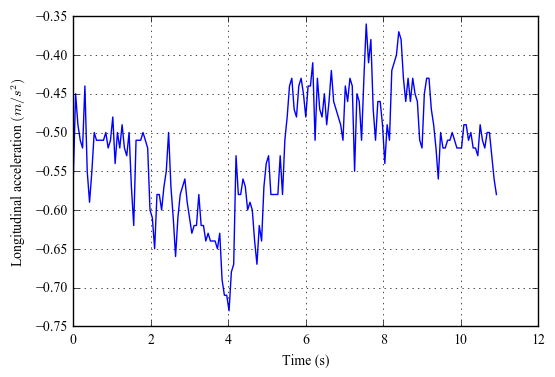

In [12]:
# Plots the figure as an image rather than as an interactive plot
%matplotlib inline 

plt.figure(1)       # Plots the figure in Figure 1. Other graphs can be plotted on the same figure if required.
plt.plot(time, xaccel)  # Plots two variables against each other.
plt.grid(True)          # Includes grid lines
plt.xlabel('Time (s)')  # Labels the x axis
plt.ylabel('Longitudinal acceleration ' r'$(m/s^2)$') # Labels the y axis

Next, we need to integrate the longitudinal acceleration to get the longitudinal velocity. This will be done using a trapezium integration scheme. Run the codeblock below to obtain the longitudinal velocity and plot it. 

In [5]:
xvel = func6.TrapInt(time, xaccel) # Integrates the longitudinal acceleration with a trapezium integration scheme

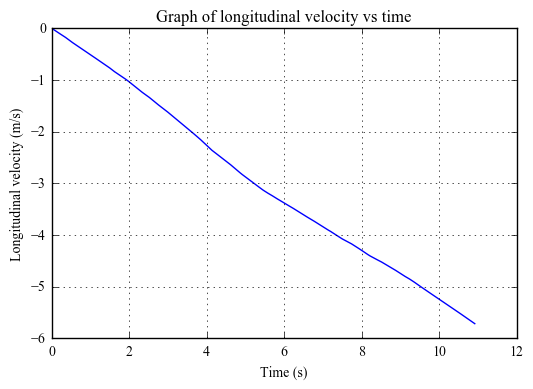

In [7]:
# Plots the longitudinal velocity against time
%matplotlib inline
plt.figure(1)
plt.plot(time,xvel)
plt.xlabel('Time (s)')
plt.ylabel('Longitudinal velocity (m/s)')
plt.title('Graph of longitudinal velocity vs time')
plt.grid(True)

*Your graph of longitudinal velocity against time most likely shows the sensor increasing its speed over the entire duration of the run. Why might this be?* 

In [4]:
from ipywidgets import widgets
from IPython.display import display

button1 = widgets.Button(description="The noise in the data")
button2 = widgets.Button(description="The offset in the data")
button3 = widgets.Button(description="Using the wrong data")
display(button1, button2, button3)

button1.on_click(func6.click4)
button2.on_click(func6.click5)
button3.on_click(func6.click6)

Incorrect. Try again.
Correct. The offset in the acceleration data means that the sensor's velocity increases linearly for the duration of the run.


Given that the offset in the acceleration data is producing a linear drift in the velocity, removing this drift will correct the velocity data. Run the codeblock below to remove the linear drift. 

In [8]:
xvel = func6.DriftDel4(xvel, time) # Removes linear drift from the longitudinal velocity

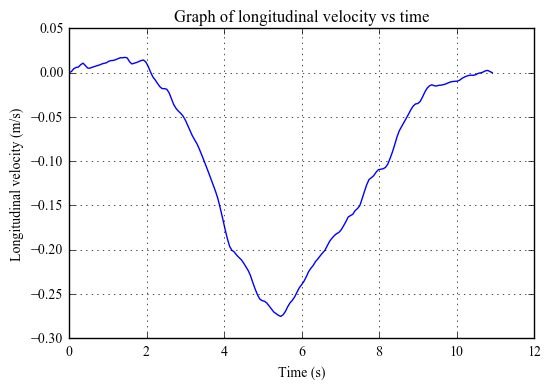

In [9]:
# Plots longitudinal velocity against time
plt.figure(1)
plt.plot(time,xvel)
plt.xlabel('Time (s)')
plt.ylabel('Longitudinal velocity (m/s)')
plt.title('Graph of longitudinal velocity vs time')
plt.grid(True)

Now that you have an accurate set of data for the longitudinal velocity, we can integrate the velocity again to find the longitudinal displacement. 

In [ ]:
s = func6.TrapInt(time, xvel) # Integrates the longitudinal velocity with a trapezium integration scheme

In [ ]:
# Plots longitudinal displacement against time
plt.figure(1)
plt.plot(time, s)
plt.xlabel('Time (s)')
plt.ylabel('Intrinsic displacement (m)')
plt.title('Graph of displacement vs time')
plt.grid(True)

*The final displacement of the sensor should be approximately zero, as the microcontroller has returned to its starting point. If it is not, why might this be the case? Discuss with your demonstrator.*

## 7. Circular run

The straight line path reconstruction you carried out in Section 6 was relatively simple, only needing the longitudinal acceleration to find the displacement and hence the position of the microcontroller. For more complicated paths, you will need to use the longitudinal acceleration and the angular velocity to find the position of the microcontroller. 

![](Intrinsic2.png)

The above diagram is taken from the CUED Mechanics Data Book, and shows how to define the position of a body in intrinsic coordinates. To define a particle's position in intrinsic coordinates, we need $s$, the distance travelled by the particle along the path, and $\psi$, the angular displacement of the particle's velocity from its starting position. 

You already know how to find $s$ from Section 6, where you integrated the longitudinal acceleration twice. In a similar manner you will integrate the angular velocity once to obtain $\psi$. 

*Once you have the intrinsic coordinates for the microcontroller, you will need to convert them into Cartesian coordinates so they can be plotted on a graph. How will you do this, bearing in mind that you will have the intrinsic coordinates for each timestep of 60ms? Check your answer with your supervisor.*

Once you have the answer to this question, carry out a circular run with the microcontroller. Mount the microcontroller on the turntable and rotate it 360$^{\circ}$. Remember to log your data as in Section 3.2., and to read the data into the Notebook by running the Data Logging Codeblock.

### 7.1. Path reconstruction

As with the straight-line run, you can use the data collected to reconstruct the path travelled by the microcontroller. Firstly you will integrate the longitudinal acceleration to obtain the longitudinal velocity, before using the drift removal function to remove the linear drift created by the microcontroller. 

In [ ]:
xvel = func6.TrapInt(time, xaccel) # Integrates the longitudinal acceleration with a trapezium integration scheme
xvel = func6.DriftDel4(xvel, time) # Removes linear drift from the longitudinal velocity

You can obtain the intrinsic displacement of the microcontroller by integrating the velocity again. 

In [ ]:
s = func6.TrapInt(time, xvel) # Integrates the longitudinal velocity with a trapezium integration scheme

*What would we expect the final displacement of the microcontroller to be?*

In [ ]:
button1 = widgets.Button(description="Zero.")
button2 = widgets.Button(description="One rotation.")
display(button1, button2)

button1.on_click(func6.click7)
button2.on_click(func6.click8)

We can check this by plotting the displacement against time, as we did for the straight-line run.

In [ ]:
# Plots longitudinal displacement against time
%matplotlib inline
plt.figure(1)
plt.plot(time, s)
plt.xlabel('Time (s)')
plt.ylabel('Intrinsic displacement (m)')
plt.title('Graph of displacement vs time')
plt.grid(True)

For the straight-line run, this would be sufficient to reconstruct the path travelled by the microcontroller. However, we now have the added complication of the angular displacement of the microncontroller. To obtain the angular displcement, you will integrate the angular velocity. 

In [ ]:
zomega = zomega * np.pi/180 # This converts the angular velocity into radians/second. 
phi = func6.TrapInt(time, zomega) # Integrates the z-axis angular velocity

In [ ]:
# Plots the angular displacement of the sensor. 
%matplotlib inline
plt.figure(1)
plt.plot(time, phi)
plt.xlabel('Time (s)')
plt.ylabel('Angle of rotation (rad)')
plt.title('Graph of angle of rotation vs time')
plt.grid(True)

You now need to convert the intrinsic coordinates into Cartesian coordinates. 

In [ ]:
# Converts the intrinsic coordinates into Cartesian coordinates
y = func6.IntToCartY(s,phi,time) 
x = func6.IntToCartX(s,phi,time)

These Cartesian coordinates can then be plotted on a graph to show your reconstructed path. 

In [ ]:
# Plots the Cartesian coordinates on a graph
plt.figure(7)
plt.xlabel('x displacement (m)')
plt.ylabel('y displacement (m)')
plt.title('Graph of reconstructed path travelled')
plt.plot(x,y)
plt.axis('equal')
plt.grid(True)

*Why might there be significant errors in the path reconstruction you have performed? Discuss with your supervisor.*

### 7.2. Comparison of the gyroscope and the accelerometer

The accuracy of the gyroscope and the accelerometer in the BNO055 is key to the path reconstruction you have performed. It is therefore important to check how reliable they both are, especially relative to each other. To see how they perform comparatively, you will compare the angular velocities measured by both. For the gyroscope, obtaining the angular velocity is straightforward, as this is its output. For the accelerometer, calculating the angular velocity is slightly more difficult, as it requires dividing the angular velocity by the radius of the path.  

**The first task is to measure the radius of the path.** Measure this from the centre of the turntable to the BNO055 on the microcontroller. Enter your value below:

In [ ]:
radius = input('Enter measured path radius: ')
radius = float(radius) # Converts your string into a float

Having measured the path radius, you can calculate the angular velocity according to the acclerometer by dividing the longitudinal velocity by the radius. 

In [ ]:
zomega2 = xvel/radius # Calculates the angular velocity

We can compare the two angular velocities by plotting them on a single figure. 

In [ ]:
%matplotlib inline
plt.figure(1)
plt.plot(time,zomega)
plt.plot(time,zomega2)
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (radians/s)')
plt.grid(True)
plt.legend(["Gyroscope angular velocity","Accelerometer angular velocity"], loc=4)

*What might be the reasons for any discrepancies between the two measurements? Of the two instruments, which do you think is more accurate? Why?*

### 7.3. Using the rev counter

We saw in Section 7.1. that the path reconstruction contained significant errors. One major cause of this was the double integration of the longitudinal acceleration measured by the accelerometer. An alternative approach could be to instead use the rev counter mounted on the wheel to measure the distance travelled.

*By examining the rev counter, how do you think the rev counter measures the number of revolutions?* 

In [ ]:
button1 = widgets.Button(description="Magnetic reed switch.")
button2 = widgets.Button(description="Optical sensor.")
button3 = widgets.Button(description="Sensor on the wheel.")
display(button1, button2, button3)

button1.on_click(func6.click9)
button2.on_click(func6.click10)
button3.on_click(func6.click11)

*Why do you think the wheel has 8 lines on it instead of 1?*

Once we have the number of pulses produced by the rev counter, we divide this number by 8 to find the number of revolutions. By multiplying the number of revolutions by the circumference of the wheel, we can calculate the distance travelled by the wheel. 

Firstly, measure the radius of the wheel:

In [ ]:
radiusw = input('Enter measured wheel radius: ')
radiusw = float(radiusw) # Converts your string into a float

Secondly, calculate the circumference of the wheel:

In [ ]:
circumw = 2 * np.pi * radiusw # Multiplies the wheel radius by 2 pi
print(circumw)

Thirdly, multiply the circumference by the number of revolutions to give the distance travelled:

In [ ]:
s2 = circumw * rev/8

We can compare the performance of the rev counter to the accelerometer by performing the path reconstruction again, but this time using the distance travelled calculated by the rev counter rather than the accelerometer.

In [ ]:
# Converts the intrinsic coordinates into Cartesian coordinates
y = func6.IntToCartY(s2,phi,time) 
x = func6.IntToCartX(s2,phi,time)

In [ ]:
# Plots the Cartesian coordinates on a graph
plt.figure(7)
plt.xlabel('x displacement (m)')
plt.ylabel('y displacement (m)')
plt.title('Graph of reconstructed path travelled')
plt.plot(x,y)
plt.axis('equal')
plt.grid(True)

*Of the two path reconstructions, which one is more accurate?*

## 8. Arbitrary run

Now that we have settled on the best method to carry out a path reconstruction, it's time to see how the apparatus performs in a more complicated path. For this final part of the experiment, you will mount the microcontroller on a car and move it around the DPO in a random path that returns to its original start point. 

Mount the microcontroller on the car provided, making sure that it is securely attached. Log data as in Section 3.2., and read your data into the Notebook using the Data Logging Codeblock. Move the car around one of the desks in the DPO, making sure to return it to its original start point.  

## 8.1. Path reconstruction

You have already carried out two path reconstructions that use all the functions that you will need for this section. Consequently, for this part of the experiment, you will be expected to write your own code to reconstruct the microcontroller's path, albeit with some hints and the previous sections to help you as a guide. Write your code in the blank codeblocks provided.

Firstly, you need to find the distance travelled by the microcontroller. You can either use the accelerometer or the rev counter to achieve this. 

In [ ]:
# Write your code below.

Now that you have the distance travelled by the microcontroller, you need to find the angular displacement of the microcontroller. Use the example in the previous section as guidance on how to do this.

In [ ]:
# Write your code below,

Now that you have both the distance travelled and the angular displacement of the microcontroller, you need to convert these into Cartesian coordinates that can be plotted on a graph. 

In [ ]:
# Write your code below

Finally, you can plot the Cartesian coordinates on a graph to see how well the path reconstruction performed. 

In [ ]:
# Write your code below. 

*How well did your path reconstruction perform? Discuss with your supervisor.*

*What conclusions can you draw from the experiment about the accuracy of the path reconstruction compared to reality? What does this suggest about experimental results?*

## 9. Report

Begin your report on a new page in your laboratory notebook, putting the title of the experiment as the main heading, followed by your name, college, lab group number and date.

Your report should use the following structure: 

**Introduction:** The introduction should summarise what you have done, your reasons for doing it and what you have concluded, in 100 words or less. Leave space for it at the beginning of your report and write it after you have written the rest.

**Results:** Print out the key graphs from the experiment for each section and stick them in. Label each one as a separate figure with a caption, e.g. Figure 1: Straight-line path reconstruction. 

**Discussion of Results:** Discuss each of the graphs you have presented in the Results section. Use the questions asked in the relevant section of the Notebook as a guide, but also point out any other relevant features that you think are appropriate. 

**Conclusions:** Summarise the main points of the experiment, possibly in bullet point form. Keep this concise, and do not introduce any new material. This should be a summary of the Discussion of Results section. 